In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
dt=pd.read_csv(r'C:\Users\MONTU\Desktop\data science videos\project\bmi\500-person-gender-height-weight-bodymassindex\bmi.csv')
dt

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [4]:
dt.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [5]:
dt.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


label encoder- it is used to encode target values into classes 0 and 1<br>
i.e. it is used to convert letter/words into numbers

In [6]:
gender= LabelEncoder()
dt['Gender']= gender.fit_transform(dt['Gender'])

fit_transform returns the encoded value by the label encoder

In [7]:
dt.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [8]:
bins= (-1,0,1,2,3,4,5)
health= ['malnourished', 'underweight', 'fit', 'slightly overweight', 'overweight', 'extremely overweight']
dt['Index']= pd.cut(dt['Index'], bins=bins, labels= health)

here we replace the index column by the meaning of the numbers<br>
i.e each number in bins = the name in labels (BMI scale)<br>
pd.cut is used to segregate the column into bins and give them labels accordingly

In [9]:
dt['Index'].isnull().sum()

0

In [10]:
dt['Index'].value_counts()

extremely overweight    198
overweight              130
fit                      69
slightly overweight      68
underweight              22
malnourished             13
Name: Index, dtype: int64

In [11]:
dt['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

In [12]:
dt.loc[60]

Gender               0
Height             191
Weight              54
Index     malnourished
Name: 60, dtype: object

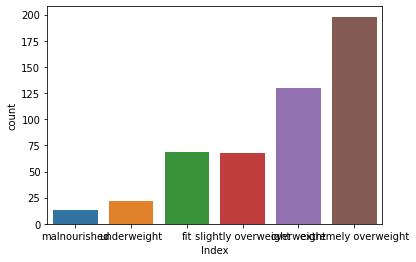

In [13]:
 sns.countplot(dt['Index'])

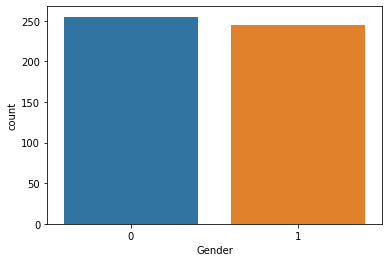

In [14]:
sns.countplot(dt['Gender'])

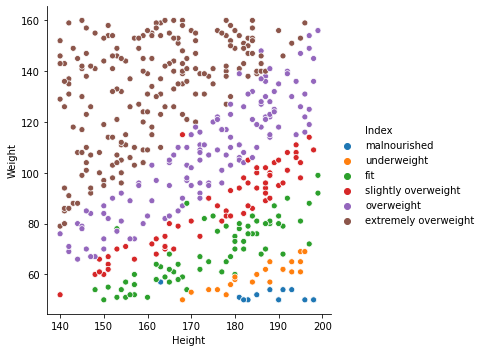

In [15]:
sns.relplot(x='Height', y='Weight', hue='Index', data=dt)

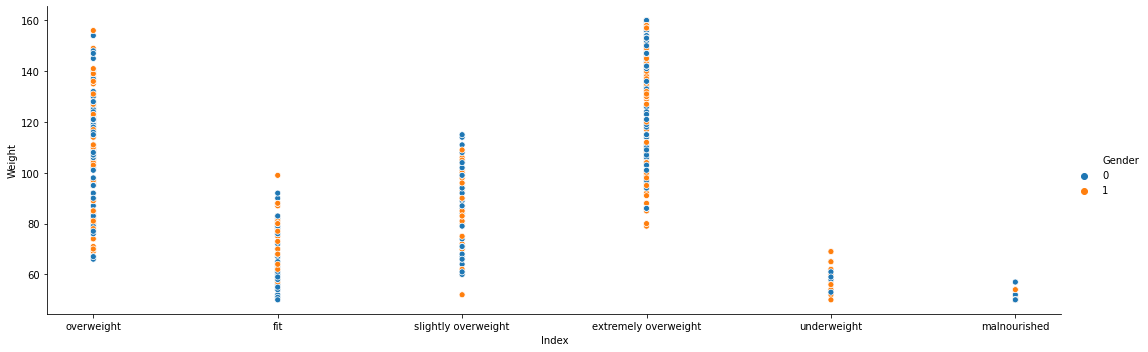

In [16]:
sns.relplot(x='Index', y='Weight', hue='Gender', data=dt, height=5, aspect= 3)

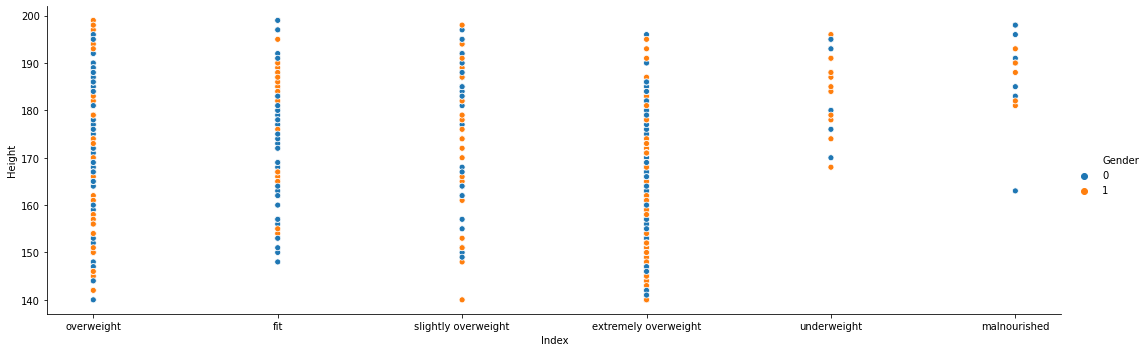

In [17]:
sns.relplot(x='Index', y='Height', hue='Gender', data=dt, height=5, aspect= 3)

In [18]:
x= dt.drop('Index', axis=1)
y= dt['Index']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [20]:
s= StandardScaler()
x_train= s.fit_transform(x_train)
x_test= s.transform(x_test)

In [21]:
x_train

array([[ 1.05131497, -0.63012682,  1.49496019],
       [-0.95118973, -0.14165642,  1.46416643],
       [ 1.05131497,  0.52999039,  0.35559097],
       ...,
       [-0.95118973, -1.42389123, -0.04472794],
       [ 1.05131497,  0.71316679,  0.1708284 ],
       [ 1.05131497, -0.14165642,  1.40257891]])

Standardize features by removing the mean and scaling to unit variance<br>
<br>
The standard score of a sample x is calculated as:<br>
<br>
z = (x - u) / s   <br>
<br>
where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False 





In other words, if the values in the data are too much different from each other,<br>
then standardisation is used to bring to values nearer to each other using mean and standard deviation<br>
to help improve the accuracy

In [22]:
np.isnan(x_train)
np.where(np.isnan(x_train))
np.nan_to_num(x_train)

array([[ 1.05131497, -0.63012682,  1.49496019],
       [-0.95118973, -0.14165642,  1.46416643],
       [ 1.05131497,  0.52999039,  0.35559097],
       ...,
       [-0.95118973, -1.42389123, -0.04472794],
       [ 1.05131497,  0.71316679,  0.1708284 ],
       [ 1.05131497, -0.14165642,  1.40257891]])

In [23]:
clf= svm.SVC()
clf.fit(x_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
pred= clf.predict(x_test)

In [26]:
print(classification_report(y_test, pred))

                      precision    recall  f1-score   support

extremely overweight       0.88      0.97      0.92        36
                 fit       0.73      0.80      0.76        10
        malnourished       0.00      0.00      0.00         3
          overweight       0.96      0.78      0.86        32
 slightly overweight       0.78      0.93      0.85        15
         underweight       0.60      0.75      0.67         4

            accuracy                           0.85       100
           macro avg       0.66      0.71      0.68       100
        weighted avg       0.84      0.85      0.84       100



In [27]:
print(confusion_matrix(y_test, pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [28]:
print(accuracy_score(y_test, pred))

0.85


In [29]:
a=[[1, 175, 64]]
s=s.transform(a)


In [31]:
b=clf.predict(a)
b

array(['overweight'], dtype=object)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

SVM's are mainly used for non-linear analysis